In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_deaths =  pd.read_csv("time_series_covid19_deaths_global.csv")
df_recovered =  pd.read_csv("time_series_covid19_recovered_global.csv")

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [4]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True) 
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [5]:
df_confirmed = df_confirmed.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Confirmed")
df_deaths = df_deaths.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Deaths")
df_recovered = df_recovered.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Recovered")

In [6]:
df_confirmed.head()

,Province/State,Country,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [7]:
df_confirmed["Deaths"] = df_deaths.Deaths
df_confirmed["Recovered"] = df_recovered.Recovered

In [8]:
df = df_confirmed

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [9]:
confirmed

,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
58,3/5/20,97882
59,3/6/20,101794
60,3/7/20,105831
61,3/8/20,109805


In [10]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [11]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [12]:
future = m.make_future_dataframe(periods=7)

In [13]:
forecast = m.predict(future)

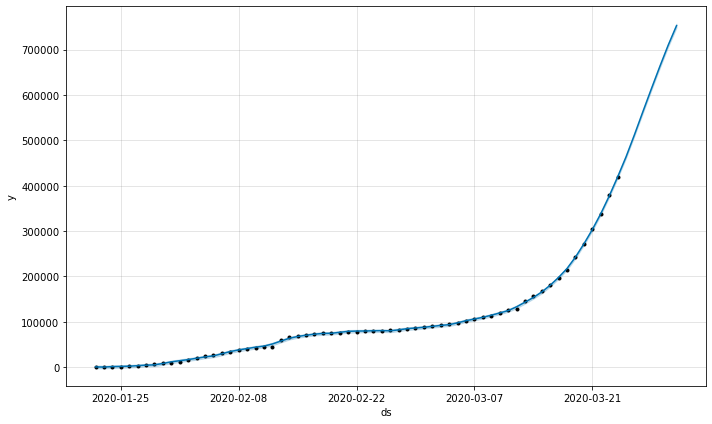

In [14]:
confirmed_forecast_plot = m.plot(forecast)

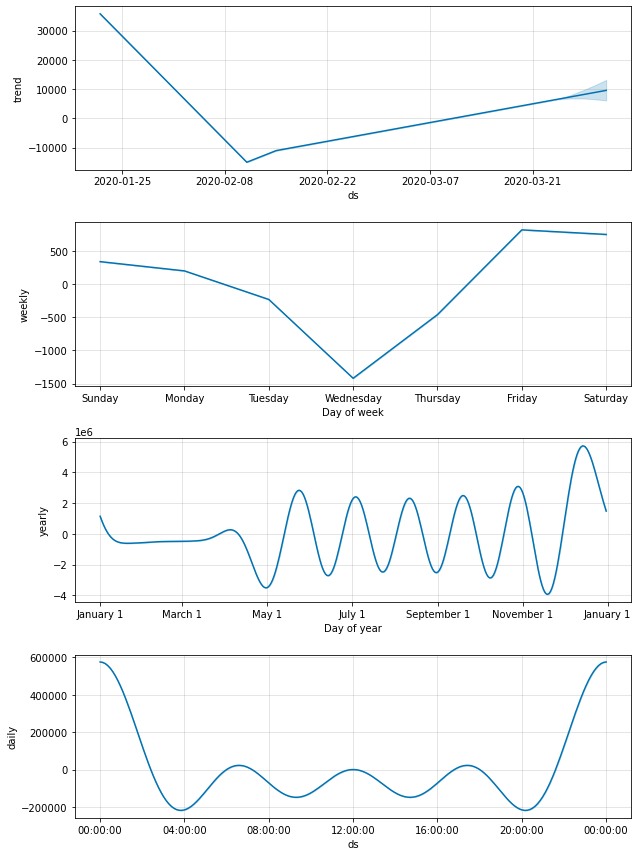

In [15]:
confirmed_forecast_plot =m.plot_components(forecast)

In [16]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

m_deaths = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m_deaths.fit(deaths)
future_deaths = m_deaths.make_future_dataframe(periods=7)

forecast_deaths = m_deaths.predict(future_deaths)

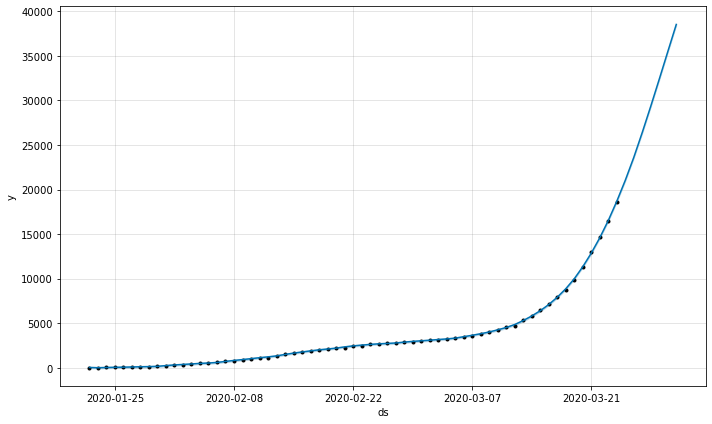

In [17]:
confirmed_forecast_plot_deaths = m_deaths.plot(forecast_deaths)

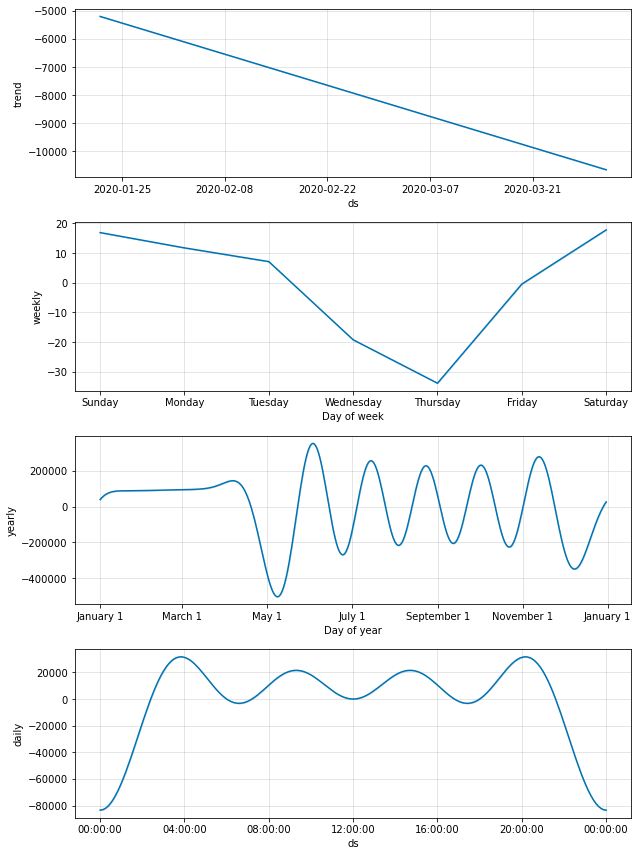

In [18]:
confirmed_forecast_plot_deaths =m_deaths.plot_components(forecast_deaths)

In [19]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

m_recovered = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m_recovered.fit(recovered)
future_recovered = m_recovered.make_future_dataframe(periods=7)

forecast_recovered = m_recovered.predict(future_recovered)

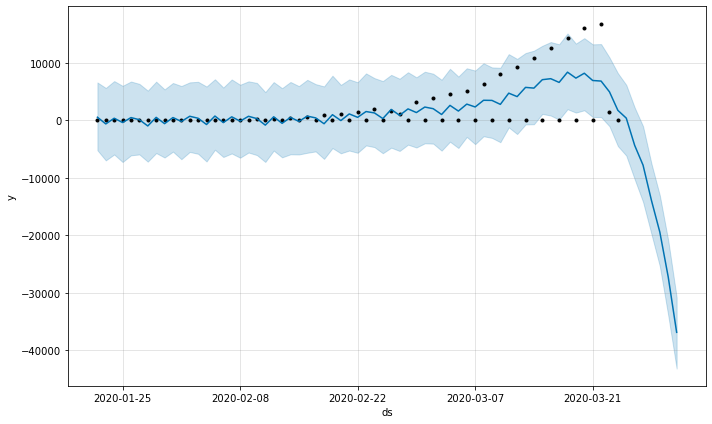

In [20]:
confirmed_forecast_plot_recovered = m_recovered.plot(forecast_recovered)

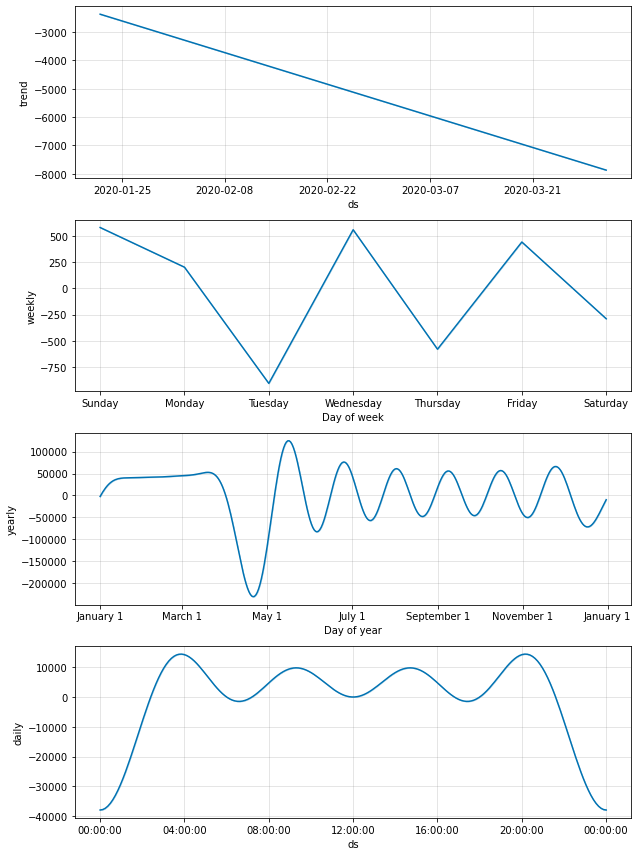

In [21]:
confirmed_forecast_plot_recovered =m_recovered.plot_components(forecast_recovered)